# matplotlib 入門 (12) nitta@tsuda.ac.jp

# 12章: 棒グラフ (2)

## 12-1: 正規分布のヒストグラムを作成して確率密度のラインをプロットする (hist)
<pre>
    Axes.hist(x,
              bins=None,  # bin(階級)の数
              range=None,  # 階級の下限と上限
              density=None,  # Falseだと度数、Trueだと確率。返り値はF(値のリスト、下限値のリスト、Patchオブジェクト)
              histtype='bar', # barのタイプ bar/barstacked/step/stepfilled
              align='mid',    # barの位置 left/mid/right
              orientation='vertical', # barの向き horizontal/vertical
              color=None,
              **kwargs   # Patchクラスのプロパティを指定できる
             )
</pre>

正規分布の確率密度関数

$\displaystyle
f(x) = \frac{1}{\sqrt{2\pi \rho}}
e^{\frac{(x - \mu)^2}{2 \sigma^2}}
$<br />
ただし、 $\mu$ は平均、 $\sigma^{2}$は分散を表す。

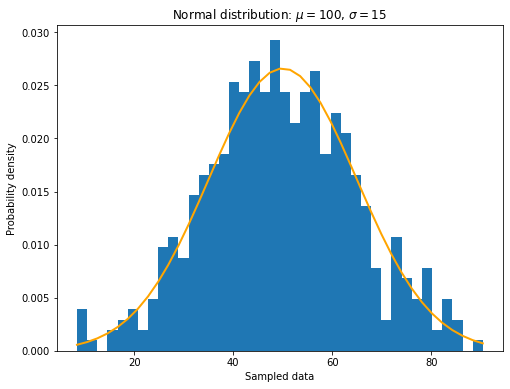

In [ ]:
# sample code 12-1
# ヒストグラムを作成し、確立密度関数のラインを描画する
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

def f(x, mean, std_dev):
    return 1./(np.sqrt(2*np.pi) * std_dev) * np.exp(-(x - mean)**2/(2 * std_dev * std_dev))

data = np.random.normal(mean, std_dev, 500)   # データを500個用意する
n_bins = 40   # 階級の数

fig, ax = plt.subplots(1, 1, figsize=(8,6))

n, bins, patches = ax.hist(
    data,
    n_bins,
    density=True,  # 確率
)

# 確率密度関数を描画する
y = f(bins, mean, std_dev)
ax.plot(bins, y, linewidth=2, color="orange")

# 軸ラベル、タイトルを表示
ax.set_xlabel('Sampled data')
ax.set_ylabel('Probability density')
ax.set_title(r'Normal distribution: $\mu=100$, $\sigma=15$')

plt.show()

## 12-2: 異なる幅のビンを並べて自動的に集計し、プロットする (hist)

10個の数値が昇順に並んでいる配列
<pre>
bins = [ 0, 20, 30, 40, 45, 50, 55, 60, 70, 100 ]
</pre>
は次の10つのビンを表す。
<pre>
     0 - 19
    20 - 29
    30 - 40
    40 - 44
    45 - 49
    50 - 54
    55 - 59
    60 - 69
    70 - 79
    80 - 99
</pre>

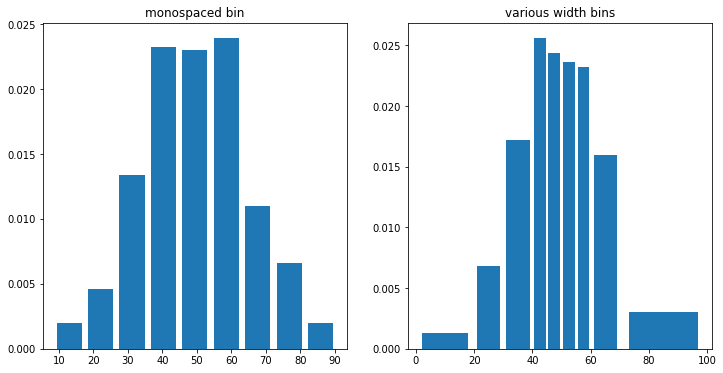

In [ ]:
# sample code 12-2
# ビンの数と幅を指定したヒストグラムの作成
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

data = np.random.normal(mean, std_dev, 500)   # データを500個用意する

bins = [ 0, 20, 30, 40, 45, 50, 55, 60, 70, 100 ]
n_bins = len(bins) - 1

fig, ax = plt.subplots(1, 2, figsize=(12,6))

n1, bins1, patches1 = ax[0].hist(
    data,
    n_bins,
    density=True,  # 確率
    histtype='bar',
    rwidth=0.8
)
ax[0].set_title('monospaced bin')

n2, bins2, patches2 = ax[1].hist(
    data,
    bins,
    density=True,  # 確率
    histtype='bar',
    rwidth=0.8
)
ax[1].set_title('various width bins')

plt.show()

## 12-3: 複数のデータを1つのヒストグラムにまとめる

ヒストグラムのビンに表示するバーの数を増やすことで、複数のデータの分布状況を1つのグラフにまとめることができる。

In [ ]:
# numpy.c_ の説明
# 2番目の軸に沿ってconcatenateするために、スライスする
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])

x = np.c_[a]
print(x)
y = np.c_[a,b]
print(y)
z = np.c_[a,b,c]
print(z)

[[1]
 [2]
 [3]]
[[1 4]
 [2 5]
 [3 6]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


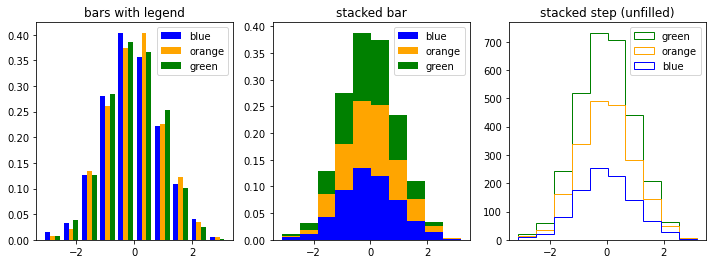

In [ ]:
# sample code 12-3
# 3種のデータをヒストグラムにする
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

a = np.random.randn(1000) # mu=0; sigma=1; np.random(mu,sigma,1000)
b = np.random.randn(1000)
c = np.random.randn(1000)
# a,b,cを axis=1 方向に連結する
x = np.c_[a,b,c]

# Figure上に 1x3 のグリッドを配置する
fig, ax = plt.subplots(1, 3, figsize=(4 * 3,4))

n_bins = 10
colors = ['blue','orange','green']

ax[0].hist(
    x,
    n_bins,
    density=True,
    histtype='bar',
    color=colors,
    label=colors  # 凡例
)
ax[0].legend(prop={'size':10})  # 凡例を表示
ax[0].set_title('bars with legend')


ax[1].hist(
    x,
    n_bins,
    density=True,
    histtype='bar',
    color=colors,
    label=colors,
    stacked=True   # 積み上げ式のbar
)
ax[1].legend(prop={'size':10})
ax[1].set_title('stacked bar')


ax[2].hist(
    x,
    n_bins,
    histtype='step', # 階段状で塗りつぶしなし
    color=colors,
    label=colors,
    stacked=True     # 積み上げ式のbar
)
ax[2].legend()
ax[2].set_title('stacked step (unfilled)')


#fig.tight_layout()
plt.show()

## 12-4: 累積度数分布(累積確率)のヒストグラムを作成する

ビンの度数を加算して累積度数分布を表すことができる。 累積度数を累積確率に変換して、バーが確率1 (100%)に向かって階段状に並ぶヒストグラムを描画する。

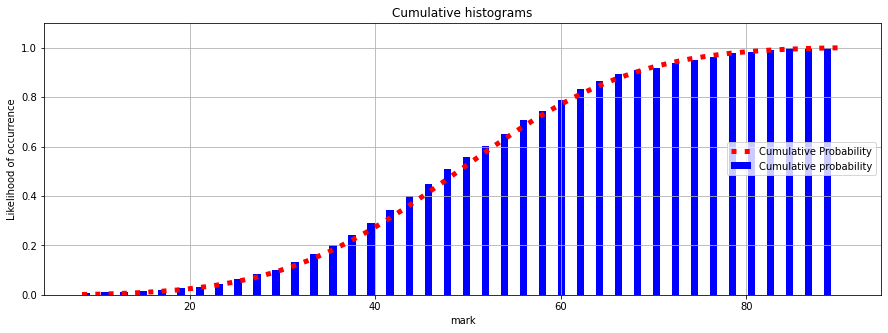

In [ ]:
# sample code 12-4
# 累積確率のヒストグラムを描画する
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

mean = 50.
std_dev = 15.   # standard deviation

def f(x, mean, std_dev):
    return 1./(np.sqrt(2*np.pi) * std_dev) * np.exp(-(x - mean)**2/(2 * std_dev * std_dev))

data = np.random.normal(mean, std_dev, 500)   # データを500個用意する
n_bins = 40   # 階級の数

fig, ax = plt.subplots(figsize=(15,5))


n,bins,patches = ax.hist(
    data,
    n_bins,
    width=0.8,
    density=True,  # 確率
    histtype='bar', # 階段状、塗りつぶしなし
    cumulative=True, # 累積確率
    color='blue',
    label='Cumulative probability'  # 凡例のラベル
)

prob = f(bins, mean, std_dev)
y2 = prob.cumsum() # 累積を計算する
y2 /= y2[-1]    # 最後の値が1になるように、最後の値で割る

ax.plot(
    bins,    # x軸: binの下限値
    y2,       # y軸: 累積確率
    linestyle='dotted',
    linewidth=5,
    color='red',    # ラインの色
    label='Cumulative Probability' # 凡例のラベル
)

# グリッド、凡例、タイトル、軸ラベルの表示
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative histograms')
ax.set_xlabel('mark')
ax.set_ylabel('Likelihood of occurrence')

ax.set_ylim(0.0, 1.1)

plt.show()
